In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [131]:
data = pd.read_csv("data/winequality-red.csv", sep=";",header = 0, index_col = None,)

<h3>Datas five first rows</h3>

In [354]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h3>Datas five last rows</h3>

In [357]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [134]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h3>Data correlation</h3>

<p>From correlation we can see that the density and quality would impact the alcohol prediction most. Three other values are chlorides, total sulfur dioxide and pH</p>

In [358]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<h3>Building the linear regression model</h3>

In [295]:
# split into explanatory and response variables 
X = data.iloc[:,:]#X = data.iloc[:,0:10]
X = X.drop(columns=['alcohol']) #X = np.concatenate((X,data.iloc[:,11:11]),axis=1)
Y = data.iloc[:,10]

# build and fit model
reg = linear_model.LinearRegression()
reg.fit(X,Y)

# output model
print("Coefficients:" ,reg.coef_)
print("Intercept:", reg.intercept_)

# compute predicted values
Y_pred = reg.predict(X)
# compute error statistics
mse = mean_squared_error(Y, Y_pred)
r2s = r2_score(Y, Y_pred) 
print("MSE = ", mse)
print("R2s = ", r2s)

Coefficients: [ 4.92480135e-01  5.89326148e-01  8.19747153e-01  2.62376361e-01
 -9.32957057e-01 -3.01862518e-03 -1.39044150e-03 -5.73634089e+02
  3.61704316e+00  9.54032683e-01  2.32220722e-01]
Intercept: 563.1752856683473
MSE =  0.3504083232624891
R2s =  0.6912531089251446


<h3>Regression equation for estimating value</h3>
<br>
<p>As we can see for our predicted values we are using 11 coefficients to multiply them with datas 11 colums and with all rows so that we can figure out the result and then summing it with intercept value. </p>
<br>
<p>Equation: 
    
prediction_y = 563.1752856683473 + 4.92480135e-01*fixed acidicity + 
    
5.89326148e-01*volatile acidicity + 8.19747153e-01*citric acid 
    
+2.62376361e-01*residual sugar -9.32957057e-01*chlorides -3.01862518e-
    
03*free sulfur dioxide -1.39044150e-03*dioxide  -5.73634089e+02*density
    
+3.61704316e+00*pH +9.54032683e-01*sulphates +2.32220722e-01*quality</p>

In [385]:
prediction_y = reg.intercept_ + X.dot(reg.coef_)
print(Y[11],"(actual value) -> ",prediction_y[11],"(predicted)")
print(Y[111],"(actual value) -> ",prediction_y[111],"(predicted)")
print(Y[1111],"(actual value) -> ",prediction_y[1111],"(predicted)")

10.5 (actual value) ->  10.469103075343014 (predicted)
9.8 (actual value) ->  9.682209975303294 (predicted)
12.3 (actual value) ->  11.905529387649949 (predicted)


<p>Merging correct data Y with predicted data Y_pred and with residual Y-Y_pred</p>

In [278]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([Y, pd.Series(Y_pred), pd.Series(Y-Y_pred)], axis=1)
df2.columns=['observed','predicted','residual']
print(df2.head())
print(df2.tail())

   observed  predicted  residual
0       9.4   9.598387 -0.198387
1       9.8   9.543285  0.256715
2       9.8   9.554177  0.245823
3       9.8  10.498632 -0.698632
4       9.4   9.598387 -0.198387
      observed  predicted  residual
1594      10.5  10.415535  0.084465
1595      11.2  10.833395  0.366605
1596      11.0  10.363166  0.636834
1597      10.2  10.572193 -0.372193
1598      11.0  10.705215  0.294785


<h3>Visualization</h3>

<Figure size 432x288 with 0 Axes>

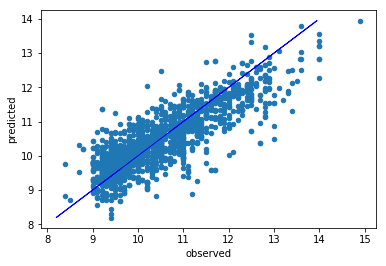

In [300]:
# plot observed vs predicted values
plt.figure()
df2.plot.scatter(x='observed', y='predicted')
plt.plot(Y_pred, Y_pred, color='blue', linewidth=1)
plt.show()

<Figure size 432x288 with 0 Axes>

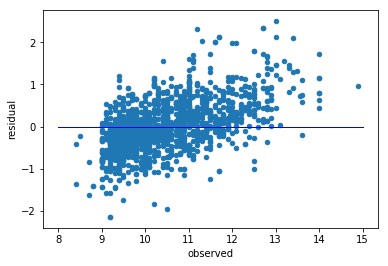

In [289]:
plt.figure()
df2.plot.scatter(x='observed', y='residual')
plt.plot([8,15], [0,0], color='blue', linewidth=1)
plt.show()

<h3>Validation</h3>
<p>Let us create new model with same data for validation purposes. We split the data where 66% is for training and 33% is for testing.</p>

In [351]:

#Splitting training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1071, 11) (1071,)
(528, 11) (528,)


<p>Create new data model and get the prediction from the splited x_test data</p>

In [348]:
#fit a model
reg2 = linear_model.LinearRegression()
model = reg2.fit(X_train,y_train)
predictions = reg2.predict(X_test)


In [306]:
# output model
print("Coefficients:" ,reg2.coef_)
print("Intercept:", reg2.intercept_)

Coefficients: [ 4.97603438e-01  5.05831858e-01  7.36117811e-01  2.73273328e-01
 -9.81625568e-01 -3.45034709e-03 -1.77601686e-03 -5.64894787e+02
  3.63804109e+00  1.00766933e+00  2.47977198e-01]
Intercept: 554.3029203298513


<p>Here we compare the correct data y_test to predicted data predictions</p>

In [349]:
mse = mean_squared_error(y_test, predictions)
r2s = r2_score(y_test, predictions) 
print("MSE = ", mse)
print("R2s = ", r2s*100,"%")

MSE =  0.34164743454009094
R2s =  70.16255861965975 %


<p>From compared data we get Mean Squared Error 0.34 and Accuracy 70.1%</p>